In [17]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [18]:
mnist = tf.keras.datasets.fashion_mnist


In [19]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

### preview training image and training label

In [20]:
! pip3 install matplotlib --quiet 

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

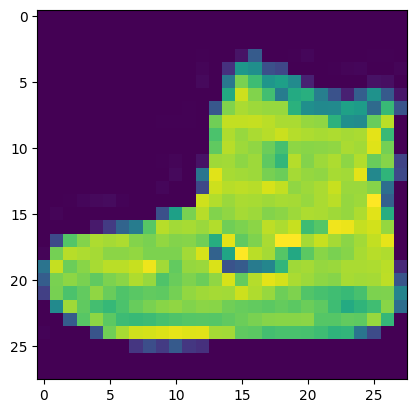

In [21]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

### normal values to binary(0/1s)

In [22]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

### preview another shoe

9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

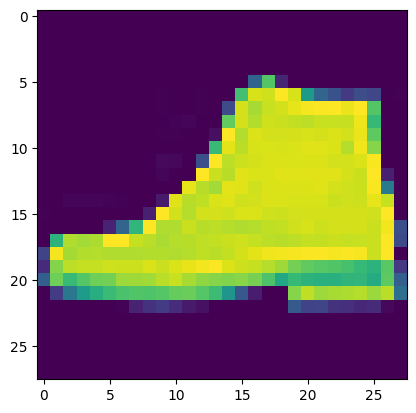

In [23]:
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[0])
print(training_images[0])

### design the model

In [24]:

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### compile and train the model

In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5004 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3732 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3366 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3131 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2939 - accuracy: 0.8919


### test the model

In [12]:
### loss and accuracy analysis

In [26]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3724 - accuracy: 0.8641


[0.3723747432231903, 0.8640999794006348]

#### exploration

In [27]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.55176531e-05 9.05803631e-07 1.20775903e-05 1.52806069e-06
 1.31799770e-05 1.22379065e-01 1.64438359e-04 3.28343473e-02
 1.24005790e-04 8.44455063e-01]


In [28]:
print(test_labels[0])

9


### increase dneisty to 512 neurons

In [29]:

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [30]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4737 - accuracy: 0.8321
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3566 - accuracy: 0.8697
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3218 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3002 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2815 - accuracy: 0.8948


In [31]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.8773


[0.3510622978210449, 0.8773000240325928]

### increase model to 1024 neurons


In [32]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4718 - accuracy: 0.8301
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3588 - accuracy: 0.8690
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3211 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2973 - accuracy: 0.8896
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2786 - accuracy: 0.8969


#### increase epochs to 10

In [34]:

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2661 - accuracy: 0.9010
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2493 - accuracy: 0.9066
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2405 - accuracy: 0.9095
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2278 - accuracy: 0.9139
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2219 - accuracy: 0.9171
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2137 - accuracy: 0.9190
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2039 - accuracy: 0.9231
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1963 - accuracy: 0.9259
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1893 - accuracy: 0.9290
Epoch 10/10
1875/1875 [==============================] - 20s 11m

#### 6


In [35]:

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 4.2332
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5235
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5247
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5115
Epoch 5/5
313/313 [==============================] - 1s 4ms/step
[5.3863577e-14 6.2940397e-13 4.4966835e-23 1.1120441e-15 1.3296768e-18
 6.9213002e-03 9.2081145e-20 8.7405488e-02 1.5002408e-10 9.0567321e-01]
9


### callbacks

In [ ]:


import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4731 - accuracy: 0.8309
Epoch 2/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3609 - accuracy: 0.8682
Epoch 3/50
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3232 - accuracy: 0.8804
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2977 - accuracy: 0.8893
Epoch 5/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2795 - accuracy: 0.8959
Epoch 6/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2656 - accuracy: 0.8998
Epoch 7/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2526 - accuracy: 0.9063
Epoch 8/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2405 - accuracy: 0.9096
Epoch 9/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2330 - accuracy: 0.9129
Epoch 10/50
1875/1875 [==============================] - 36s 19m